In [44]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

import numpy as np

community = pd.read_csv('communities_data_cleaned_sel_cols.csv', sep=',', encoding='utf-8', header= 0)
crime = community[['ViolentCrimesPerPop numeric']]
community = community[['population numeric', 'numbUrban numeric', 'medIncome numeric','NumUnderPov numeric','PctUnemployed numeric','TotalPctDiv numeric','PctSpeakEnglOnly numeric','PctWOFullPlumb numeric','RentMedian numeric']]

crime.head()

ViolentCrimesPerPop numeric
0                         0.20
1                         0.67
2                         0.43
3                         0.12
4                         0.03

C=100.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.8606
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.8616
C=1.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.8601
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.8601
C=0.01
Sparsity with L1 penalty: 55.56%
score with L1 penalty: 0.8460
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.8506


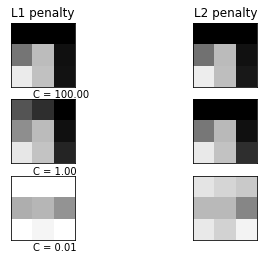

In [95]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

community.data = community
community.target = crime
X, y = community.data, community.target

y = y.values.ravel()
y = (y > 0.4).astype(np.int)


X = StandardScaler().fit_transform(X)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(3, 3)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(3, 3)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

### Comparison of the sparsity (percentage of zero coefficients) of solutions when L1 and L2 penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions.

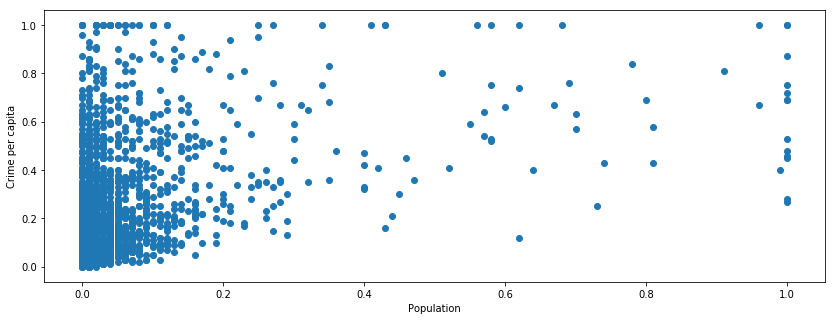

In [84]:

total = pd.read_csv('communities_data_cleaned_sel_cols.csv', sep=',', encoding='utf-8', header= 0)
points = total[['population numeric','ViolentCrimesPerPop numeric']]

points = points.values


# Looking at the plot of the points, we can see a linear trend 
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Population')
ax.set_ylabel('Crime per capita')
plt.scatter(points[:,0], points[:,1])
plt.show()


## Linear Regression and Gradient Descent

In Linear Regression, our goal is to find the parameters that minimises the mean sum of squared error function:
$$ E(m,b) = \frac{1}{2N} \sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 $$

Regularization is a very important technique in machine learning to prevent overfitting and ensure that the model generalizes well to new data. Generally, there are two forms of regularization - L1 and L2.
With L1 Regularization:¶
$$ E(m,b) = \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel\big) $$$$ \frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big) $$$$ \frac{d}{dm} = \frac{\lambda}{2N} + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big) $$
With L2 Regularization:
$$ E(m,b) = \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel^2\big) $$$$ \frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big) $$$$ \frac{d}{dm} = \frac{\lambda}{N} m + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big) $$

As it can be observed, the partial derivative with respect to b does not vary with regularization.


In [85]:


# Computes mean sum of squared error for all data points
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate, lam, regularizer):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    # Iterating over all points
    for i in range(0, len(points)):
        # Getting x and y values
        x = points[i, 0]
        y = points[i, 1]
        
        # Calculating gradients according to regularization
        if regularizer == 'L1':
            m_gradient += (lam/(2*N) -(x/N) * (y - ((m_current * x) + b_current)))
        elif regularizer == 'L2':
            m_gradient += (lam/N*m_current - (x/N) * (y - ((m_current * x) + b_current)))
        else:
            m_gradient += -(x/N) * (y - ((m_current * x) + b_current))
        b_gradient += -(1/N) * (y - ((m_current * x) + b_current))
        
    # Updating b and m with learningrate * gradients
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, lam, regularizer):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate, lam, regularizer)
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter, lam, regularizer=None):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, lam, regularizer)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [86]:
# Hyperparameters
learning_rate = 0.0000001
iterations = 500
lamb = 500

# Linear Regression with L1 
b1, m1 = run(learning_rate, iterations, lamb, 'L1')

# Linear Regression with L2 
b2, m2 = run(learning_rate, iterations, lamb, 'L2')

# Linear Regression without Regularization
b3, m3 = run(learning_rate, iterations, lamb)

Starting gradient descent at b = 0, m = 0, error = 0.11088871614844571
Running...
Iteration 0, b:2.3797893681042857e-08, m:-2.499754437813413e-05, error:0.11088993252404522
Iteration 100, b:2.404302278849347e-06, m:-0.002524751737806905, error:0.11101169157154385
Iteration 200, b:4.786222529718834e-06, m:-0.005024505447306298, error:0.11113369118750864
Iteration 300, b:7.169558631852208e-06, m:-0.007524258672877228, error:0.1112559313706006
Iteration 400, b:9.554310570812322e-06, m:-0.010024011414520593, error:0.11137841211948565
After 500 iterations b = 1.1916609646275251e-05, m = -0.012498766152055581, error = 0.1114999050289031
Starting gradient descent at b = 0, m = 0, error = 0.11088871614844571
Running...
Iteration 0, b:2.3797893681042857e-08, m:2.455621865596803e-09, error:0.11088870470104929
Iteration 100, b:2.4035751725866032e-06, m:2.4739807072654986e-07, error:0.11088756000344184
Iteration 200, b:4.783328513117688e-06, m:4.911174190566751e-07, error:0.11088641538875933
Itera

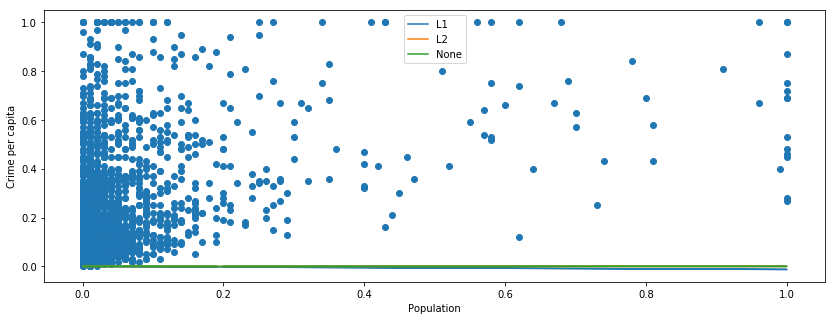

In [88]:


# Comparing best-fit line with dataset
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Population')
ax.set_ylabel('Crime per capita')
plt.plot(points[:,0], predict(b1, m1, points[:,0]), label='L1')
plt.plot(points[:,0], predict(b2, m2, points[:,0]), label='L2')
plt.plot(points[:,0], predict(b3, m3, points[:,0]), label='None')
plt.scatter(points[:,0], points[:,1])
plt.legend()
plt.show()




## Summary

### The key difference between these techniques is that Lasso (L1) shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In general L1 and L2 have differing properties:
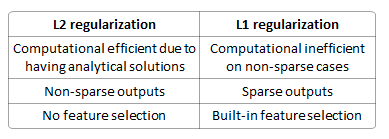



## References

1. [Vectors Linear Algebra](https://github.com/llSourcell/Vectors_Linear_Algebra) by Siraj Raval
2. [Regularized Linear Regression](https://www.coursera.org/learn/machine-learning/lecture/QrMXd/regularized-linear-regression) by Andrew Ng
3. [L1 and L2 Regularization with Linear Regression model](https://github.com/jrios6/Math-of-Intelligence/tree/master/3-Regularization) by Ong Jia Rui
4. [Differences between L1 and L2 as Loss Function and Regularization](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/) by log0


# Conclusion

In our case for sample data it turns out the not none regularization turns out to be the better option as any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes.

However since we have a high number of features and since Lasso helps with features selection it performs a little better than Ridge regularization.

number of estimated clusters : 7


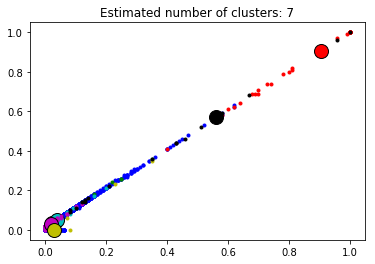

In [103]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# Compute clustering with MeanShift

centers = [[1, 1], [-1, -1], [1, -1]]
X = pd.read_csv('communities_data_cleaned_sel_cols.csv', sep=',', encoding='utf-8', header= 0).values

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()